# Problem 210: Obtuse Angled Triangles

Consider the set $S(r)$ of points $(x,y)$ with integer coordinates satisfying $|x| + |y| \le r$.\
Let $O$ be the point $(0,0)$ and $C$ the point $(r/4,r/4)$.\
Let $N(r)$ be the number of points $B$ in $S(r)$, so that the triangle $OBC$ has an obtuse angle, i.e. the largest angle $\alpha$ satisfies $90^\circ \lt \alpha \lt 180^\circ$.\
So, for example, $N(4)=24$ and $N(8)=100$.

What is $N(1\,000\,000\,000)$?

In [165]:
from math import acos, degrees, sqrt
from typing import Tuple


# for triangle with points O = (0, 0), C = (r/4, r/4) and B = (x, y) return the max angle of the triangle BCO
def max_angle(b: Tuple[int, int], r: int) -> float:
    origin = (0, 0)
    c = (r / 4, r / 4)
    if b == origin:
        return 0
    if b == c:
        return 0
    oc2 = c[0] ** 2 + c[1] ** 2
    ob2 = b[0] ** 2 + b[1] ** 2
    cb2 = (c[0] - b[0]) ** 2 + (c[1] - b[1]) ** 2
    angle_o = acos((oc2 + ob2 - cb2) / (2 * sqrt(oc2 * ob2)))
    angle_c = acos((oc2 + cb2 - ob2) / (2 * sqrt(oc2 * cb2)))
    angle_b = acos((ob2 + cb2 - oc2) / (2 * sqrt(ob2 * cb2)))

    return degrees(max(angle_o, angle_c, angle_b))


# sanity check
print(max_angle((1, 0), 4))

90.0


In [169]:
# brute force solution


def is_valid(x: int, y: int, r: int) -> bool:
    return abs(x) + abs(y) <= r and 90 < max_angle((x, y), r) < 180


def N_brute_force(r: int) -> int:
    _N = 0
    for x in range(-r, r + 1):
        for y in range(-r, r + 1):
            if is_valid(x, y, r):
                _N += 1
    return _N


print("N(4) =", N_brute_force(4))
print("N(8) =", N_brute_force(8))
print("N(100) =", N_brute_force(100))
print("N(1000) =", N_brute_force(1000))
print("N(1000) =", N_brute_force(10000))

N(4) = 24
N(8) = 100
N(100) = 15944
N(1000) = 1597880
N(1000) = 159814790


To build some more intuition let's investigate some boundaries. 

Only one of the angles in the trianble $OBC$ can be obtuse.

We see that for any point $(x, y)$:

$$
\begin{align}
\angle O > 90\degree &\iff y < -x \\
\angle C > 90\degree &\iff y > -x + \frac{r}{2} \\
\angle B > 90\degree &\iff \left(\frac{\sqrt{2}r}{8}\right)^2 > \left(\frac{r}{8} - x\right)^2 + \left(\frac{r}{8} - y\right)^2
\end{align}
$$

The $\angle B$ case comes from realising that if $\angle B = 90\degree$, then the point B trace a circle with radius, $\sqrt(2)r/8$ and center $(r/8, r/8)$.

Finally, any points residing on $y = x$ are non-valid since one angle will be $180\degree$ in that case.

In [171]:
from math import acos, cos, degrees, pi, sin, sqrt
from typing import Tuple
import matplotlib.pyplot as plt


def plot(r: int):
    plt.clf()
    plt.plot([0, r, 0, -r, 0], [r, 0, -r, 0, r], "k")  # outer boundary
    plt.plot([-r / 2, r / 2], [r / 2, -r / 2], "k--")  # Angle O > 90 degree boundary
    plt.plot(
        [-r / 4, 3 * r / 4], [3 * r / 4, -r / 4], "k--"
    )  # Angle C > 90 degree boundary

    # angle B > 90 degree boundary
    angle = [2 * pi * i / 100 for i in range(101)]
    xc = [r / 8 + sqrt(2) * r / 8 * cos(a) for a in angle]
    yc = [r / 8 + sqrt(2) * r / 8 * sin(a) for a in angle]
    plt.plot(xc, yc, "k--")
    for x in range(-r, r + 1):
        for y in range(-r, r + 1):
            if is_valid(x, y, r):
                plt.plot([x], [y], "g.")  # valid points (green dots)
            else:
                plt.plot([x], [y], "b,")  # grid points (blue specks)

    plt.plot([0, r / 4], [0, r / 4], "rx")
    plt.axis("equal")
    plt.title(f"N({r}) = {N_brute_force(r)}")
    plt.show()

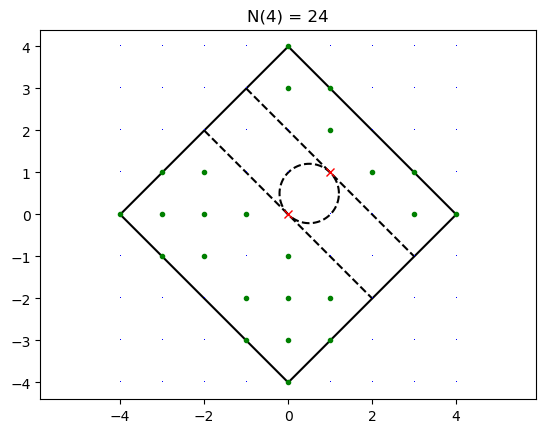

In [172]:
plot(4)

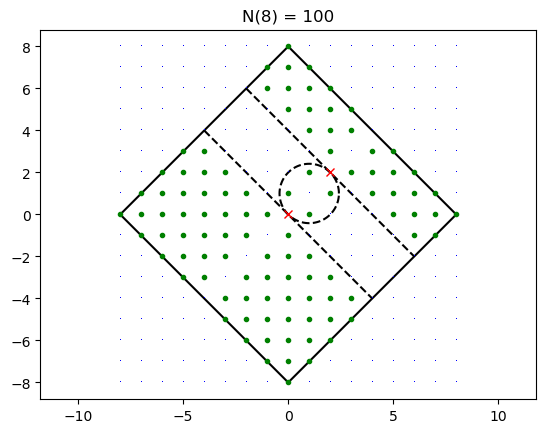

In [173]:
plot(8)

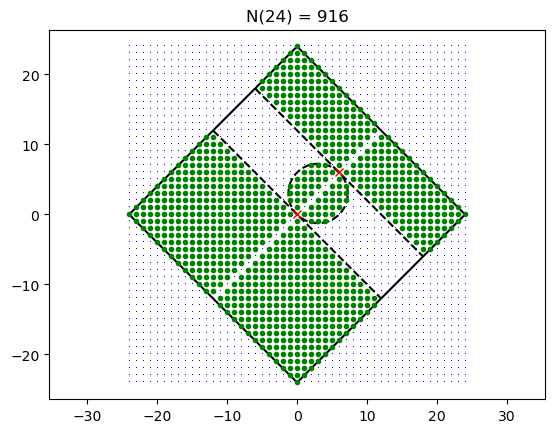

In [174]:
plot(24)

In [176]:
from math import ceil, floor


def N(r: int) -> int:
    if r % 4 != 0:
        raise ValueError("N formula is only accurate if r is divisible by 4")

    result = 0
    result += r**2 // 2  # number of points with Angle O > 90
    result += r**2 // 4  # number of points with Angle C > 90

    # number of poitns with angle B > 90
    xmax = (1 + sqrt(2)) * r / 8
    for x in range(0, int(xmax) + 1):
        _inner_sqrt = sqrt(r**2 + 16 * r * x - 64 * x**2)
        ymin = (r - _inner_sqrt) / 8
        ymax = min(x, (r + _inner_sqrt) / 8)
        result += max(ceil(ymax) - floor(ymin) - 1, 0)

    # since we only consider points with y < x, multiply with 2 to get the rest
    return 2 * result

In [179]:

print("N(4) =", N(4))
print("N(8) =", N(8))
print("N(100) =", N(100))
print("N(1000) =", N(1000))
print("N(10000) =", N(10000))
print("N(10^9) =", N(10**9))

N(4) = 24
N(8) = 100
N(100) = 15944
N(1000) = 1597880
N(10000) = 159814790
N(10^9) = 1598174770174689458
